In [237]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics
import seaborn as sns
from collections import Counter
%matplotlib inline
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  
#import sys
#np.set_printoptions(threshold=sys.maxsize)

In [238]:
%matplotlib inline
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [239]:
dataset = pd.read_csv('encoded_data.csv')
dataset.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Baths,has_MasVnrArea,has_LowQualFinSF,has_WoodDeckSF,has_OpenPorchSF,has_EnclosedPorch,has_3SsnPorch,has_ScreenPorch,has_PoolArea,has_MiscVal,open_outside_areas,door_porch,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_0,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_0,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_0,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_0,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_0,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_0,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_0,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_0,FireplaceQ

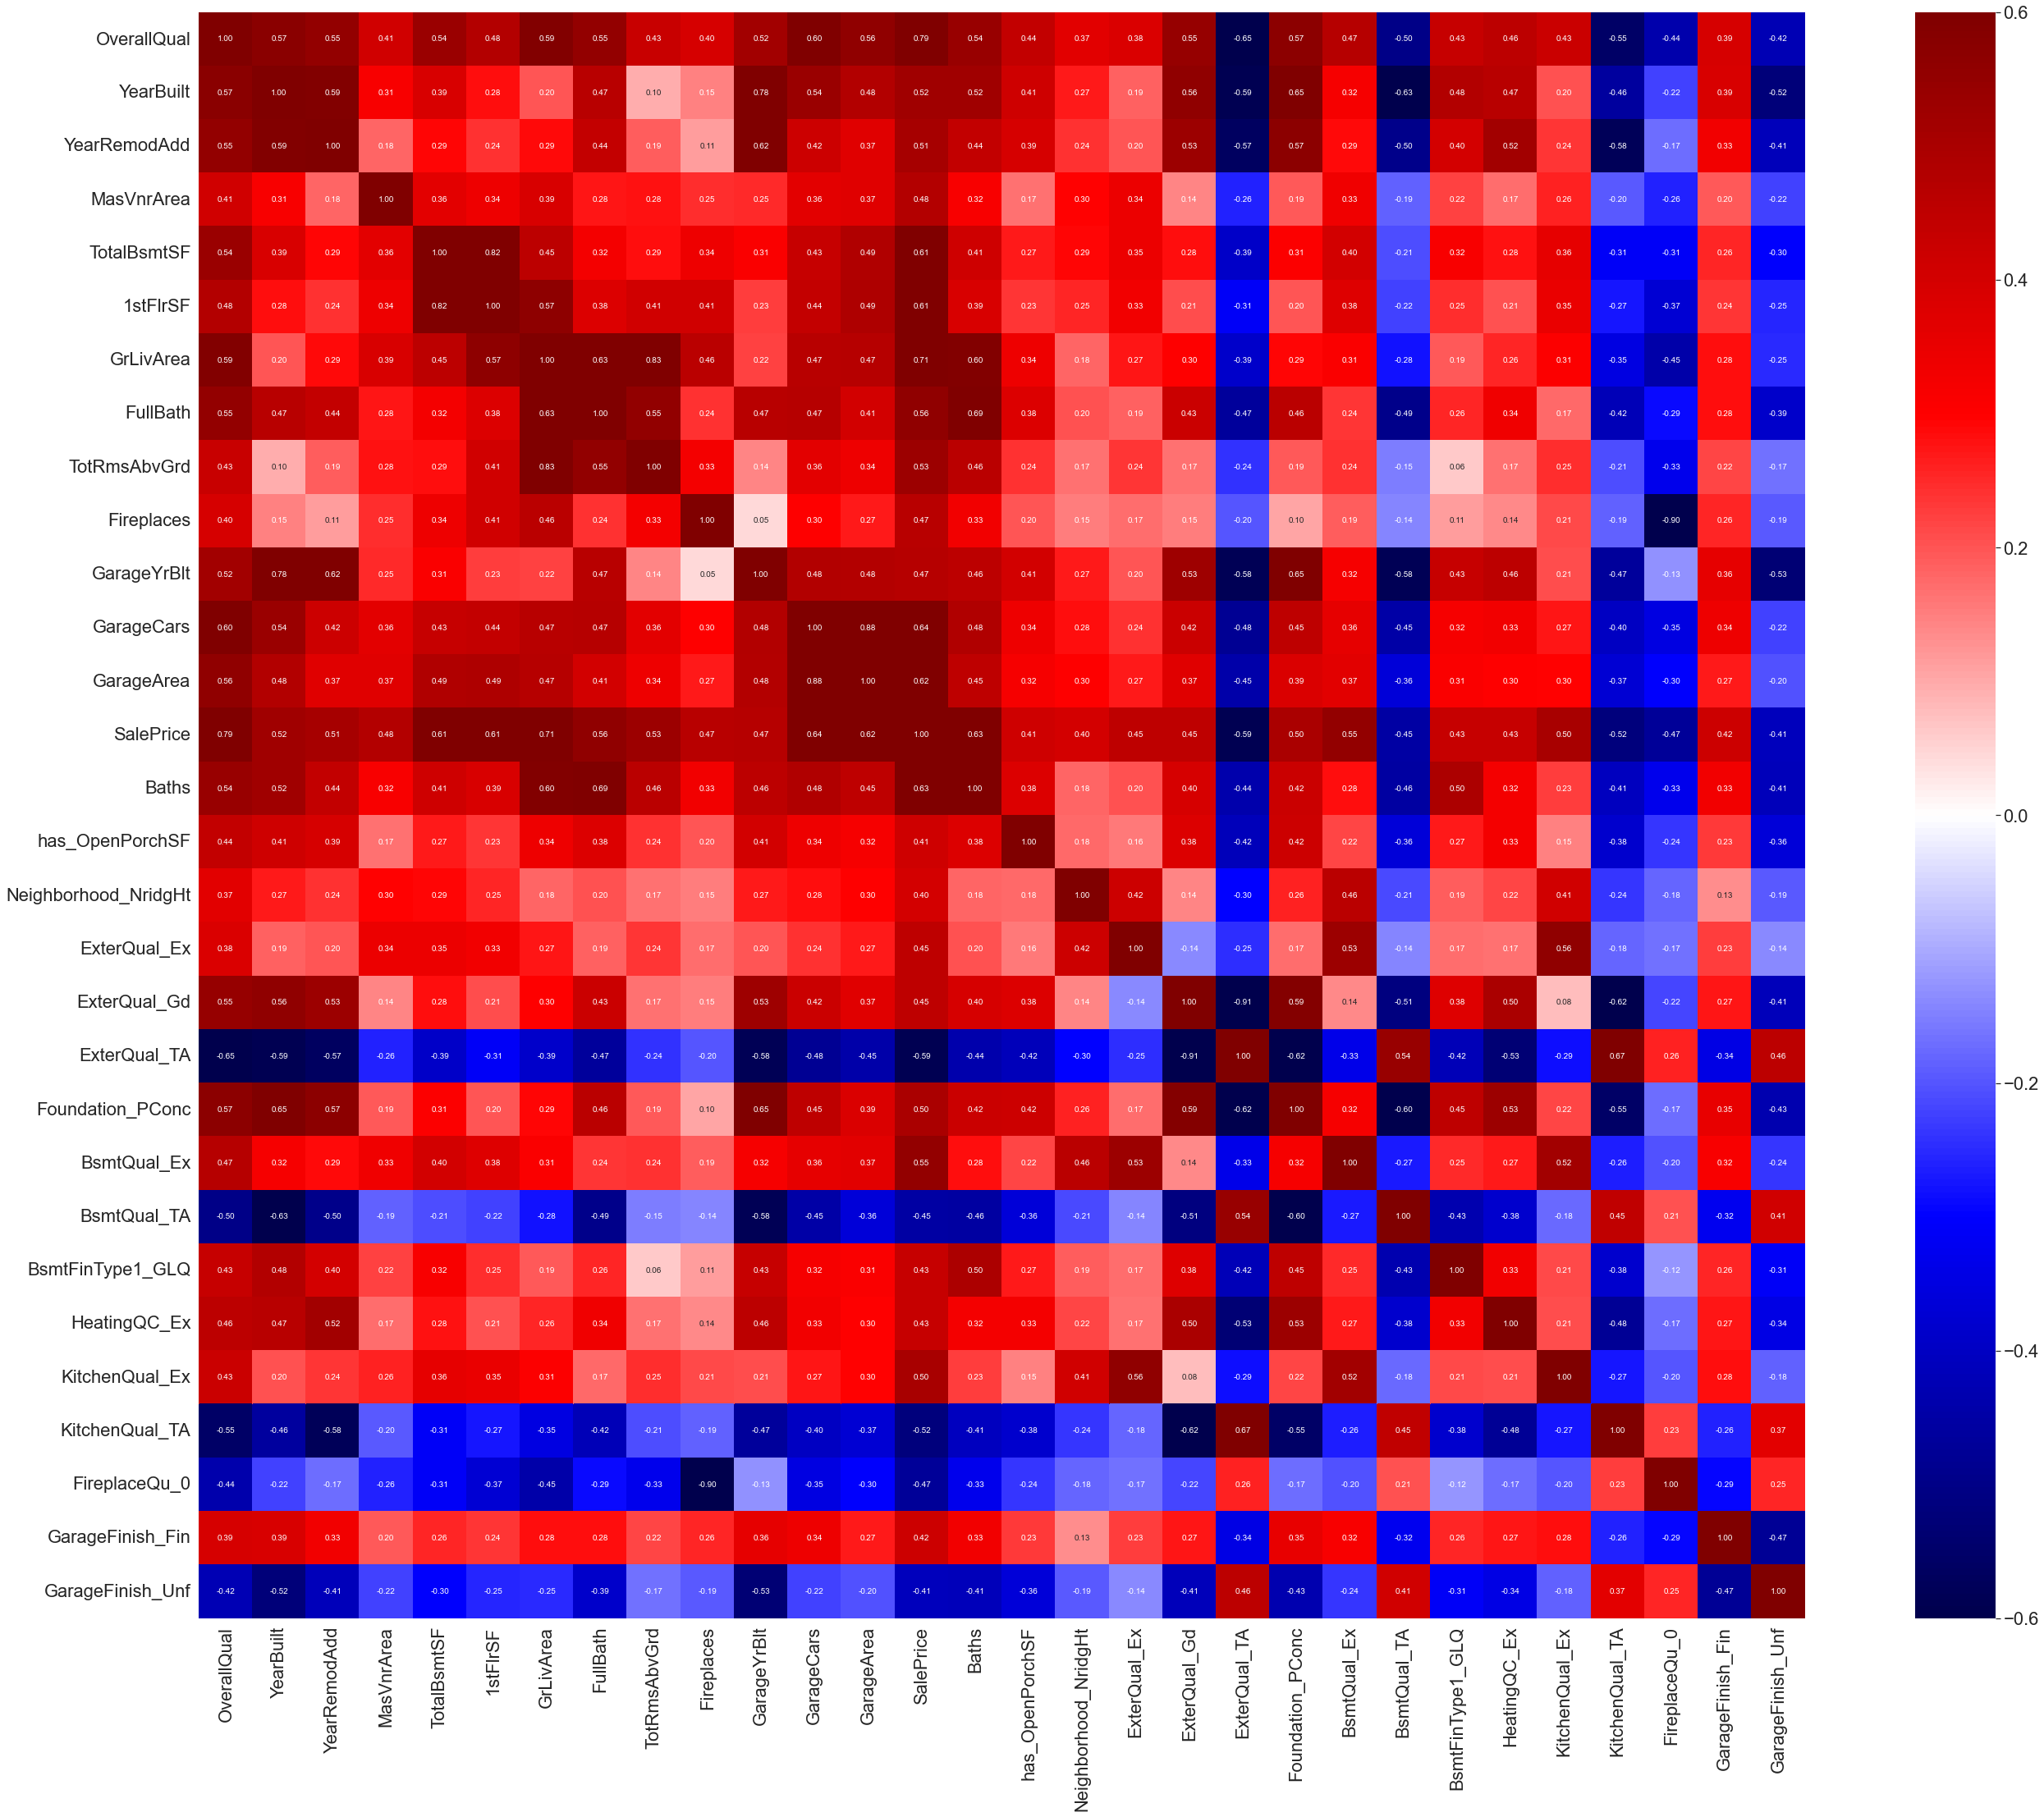

In [240]:
corr = dataset.corr()

corr_limit = 0.4

correlations = corr["SalePrice"].sort_values(ascending=False).to_string()

corr_keep_headers = corr[np.abs(corr['SalePrice']) > corr_limit].index.to_list()

corr_keep_dataset = pd.DataFrame()
corr_keep_dataset[corr_keep_headers] = dataset[corr_keep_headers]

corr_keep = corr_keep_dataset.corr()

f, ax = plt.subplots(figsize=(48, 36))
sns.heatmap(corr_keep, fmt='.2f', vmin=-0.6, vmax=0.6, square=True, annot=True, cmap="seismic")
sns.set(font_scale=2)
plt.show()

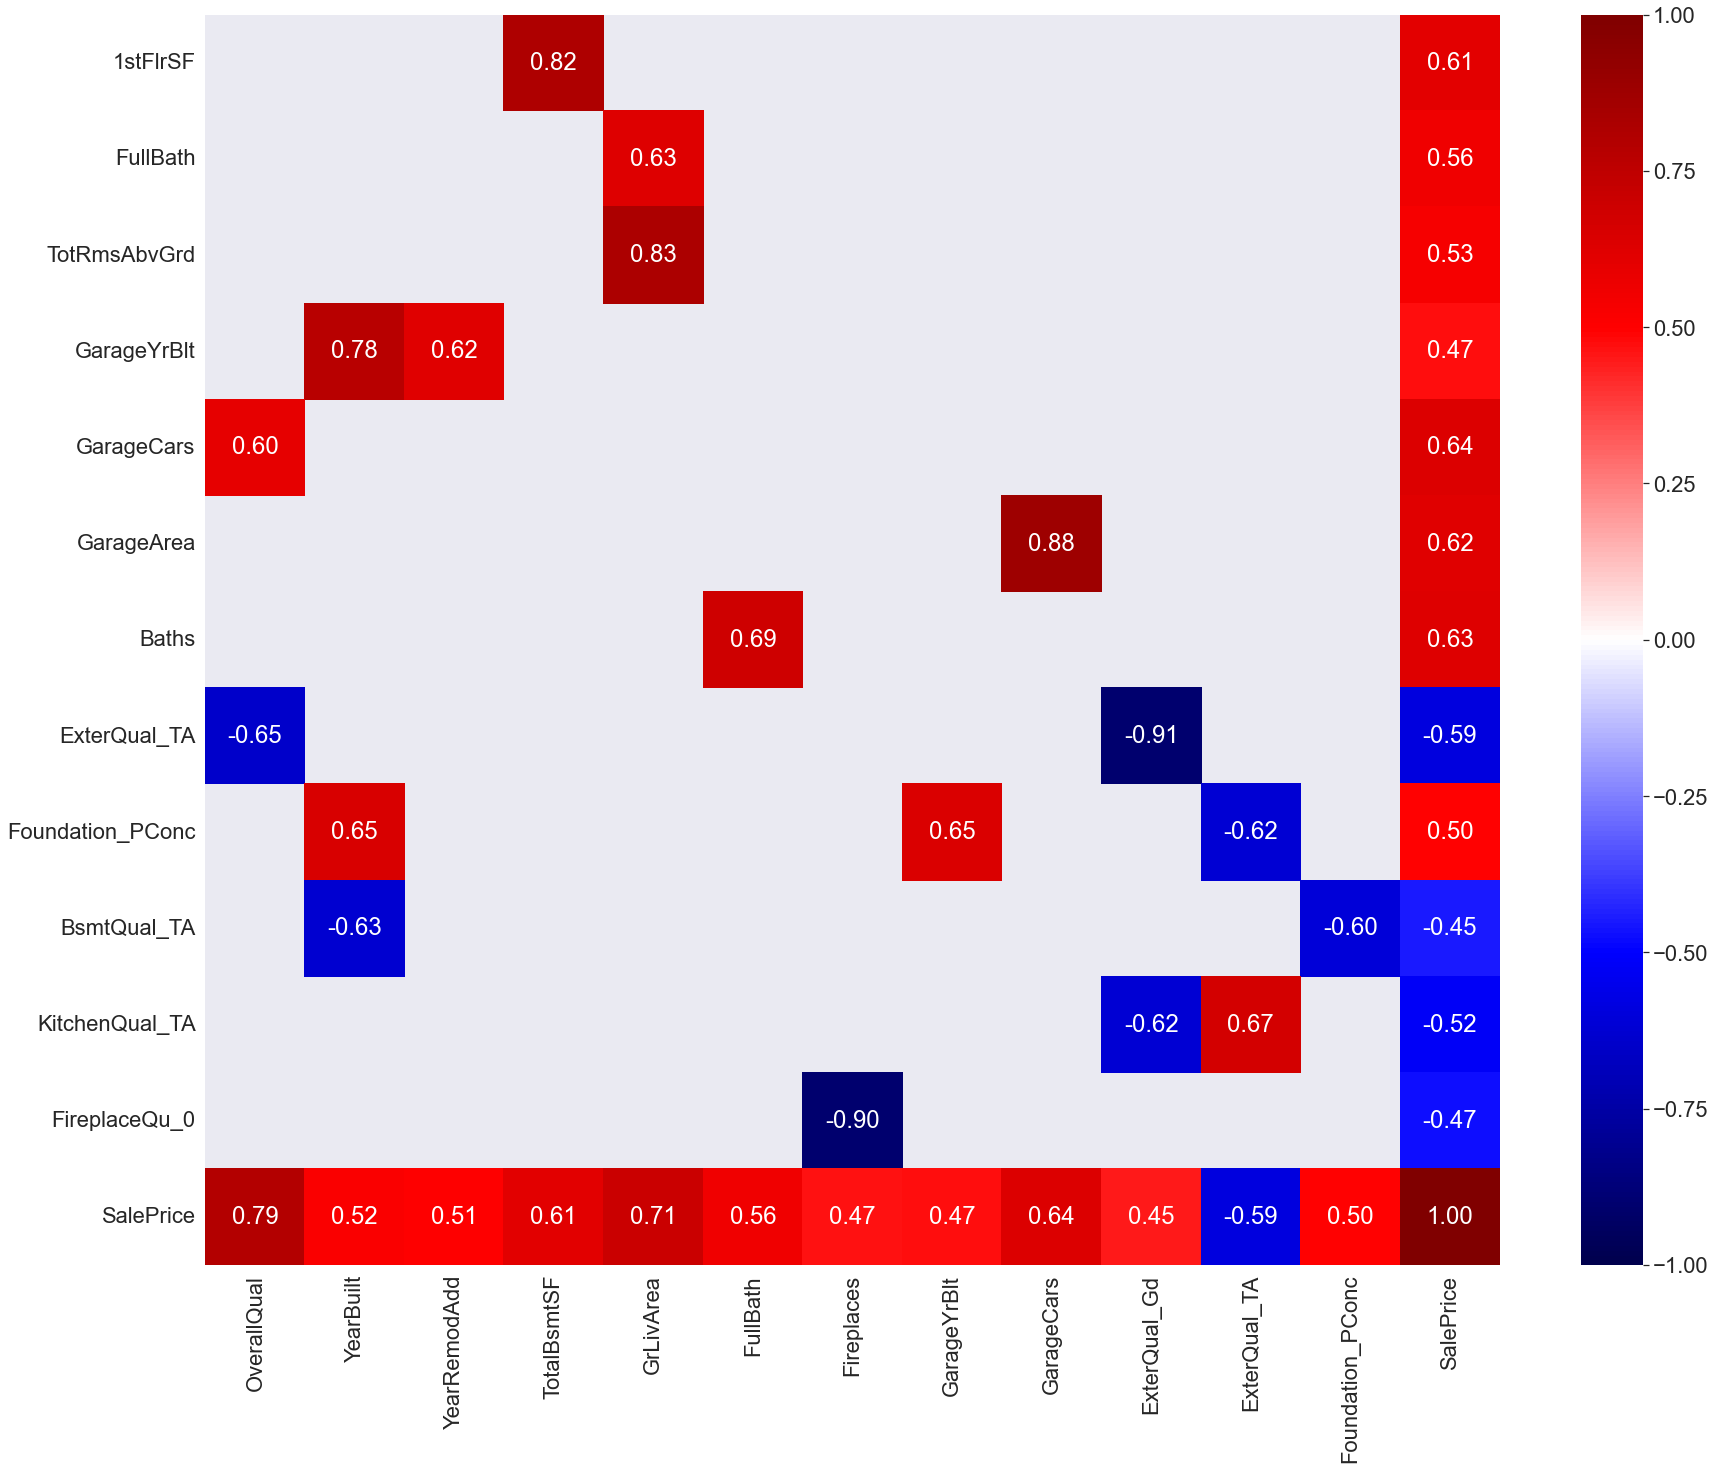

In [241]:
corr = corr_keep_dataset.drop(columns="SalePrice").corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

cut_off = 0.6  # only show cells with abs(correlation) at least this value
mask |= np.abs(corr) < cut_off

corr = corr[~mask]

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

corr["SalePrice"] = corr_keep["SalePrice"]  #Adding SalePrice correlation along bottom row 
corr = corr.append(corr_keep["SalePrice"][corr.columns]) #Adding SalePrice correlation along right column

f, ax = plt.subplots(figsize=(29, 23))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap="seismic")
sns.set(font_scale=2)
plt.show()

In [242]:
to_drop = ["FireplaceQu_0", "ExterQual_Gd", "BsmtQual_TA", "Foundation_PConc", "GarageArea", "TotRmsAbvGrd", "GarageYrBlt", "TotalBsmtSF", "FullBath"]

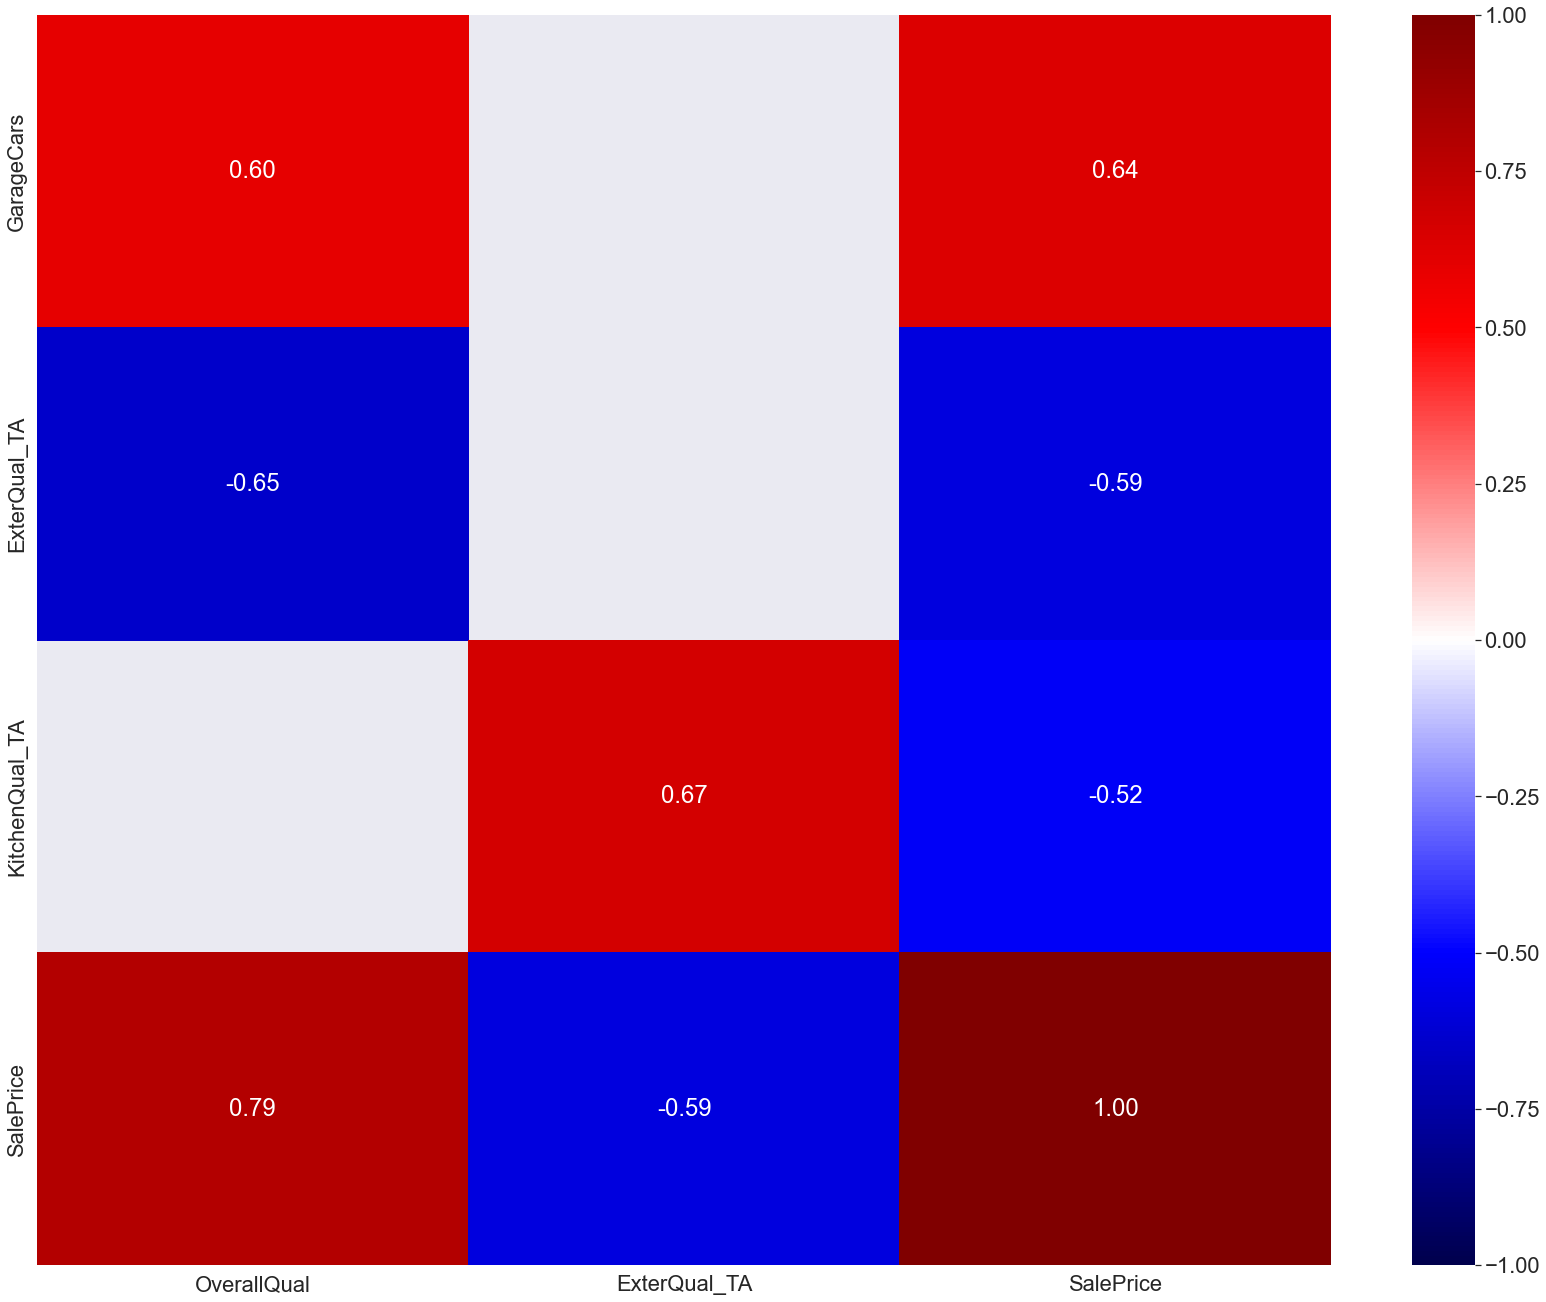

In [243]:
corr = corr_keep_dataset.drop(columns=["SalePrice"] + to_drop).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

cut_off = 0.6  # only show cells with abs(correlation) at least this value
mask |= np.abs(corr) < cut_off

corr = corr[~mask]

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

corr["SalePrice"] = corr_keep["SalePrice"]  #Adding SalePrice correlation along bottom row 
corr = corr.append(corr_keep["SalePrice"][corr.columns]) #Adding SalePrice correlation along right column

f, ax = plt.subplots(figsize=(29, 23))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap="seismic")
sns.set(font_scale=2)
plt.show()

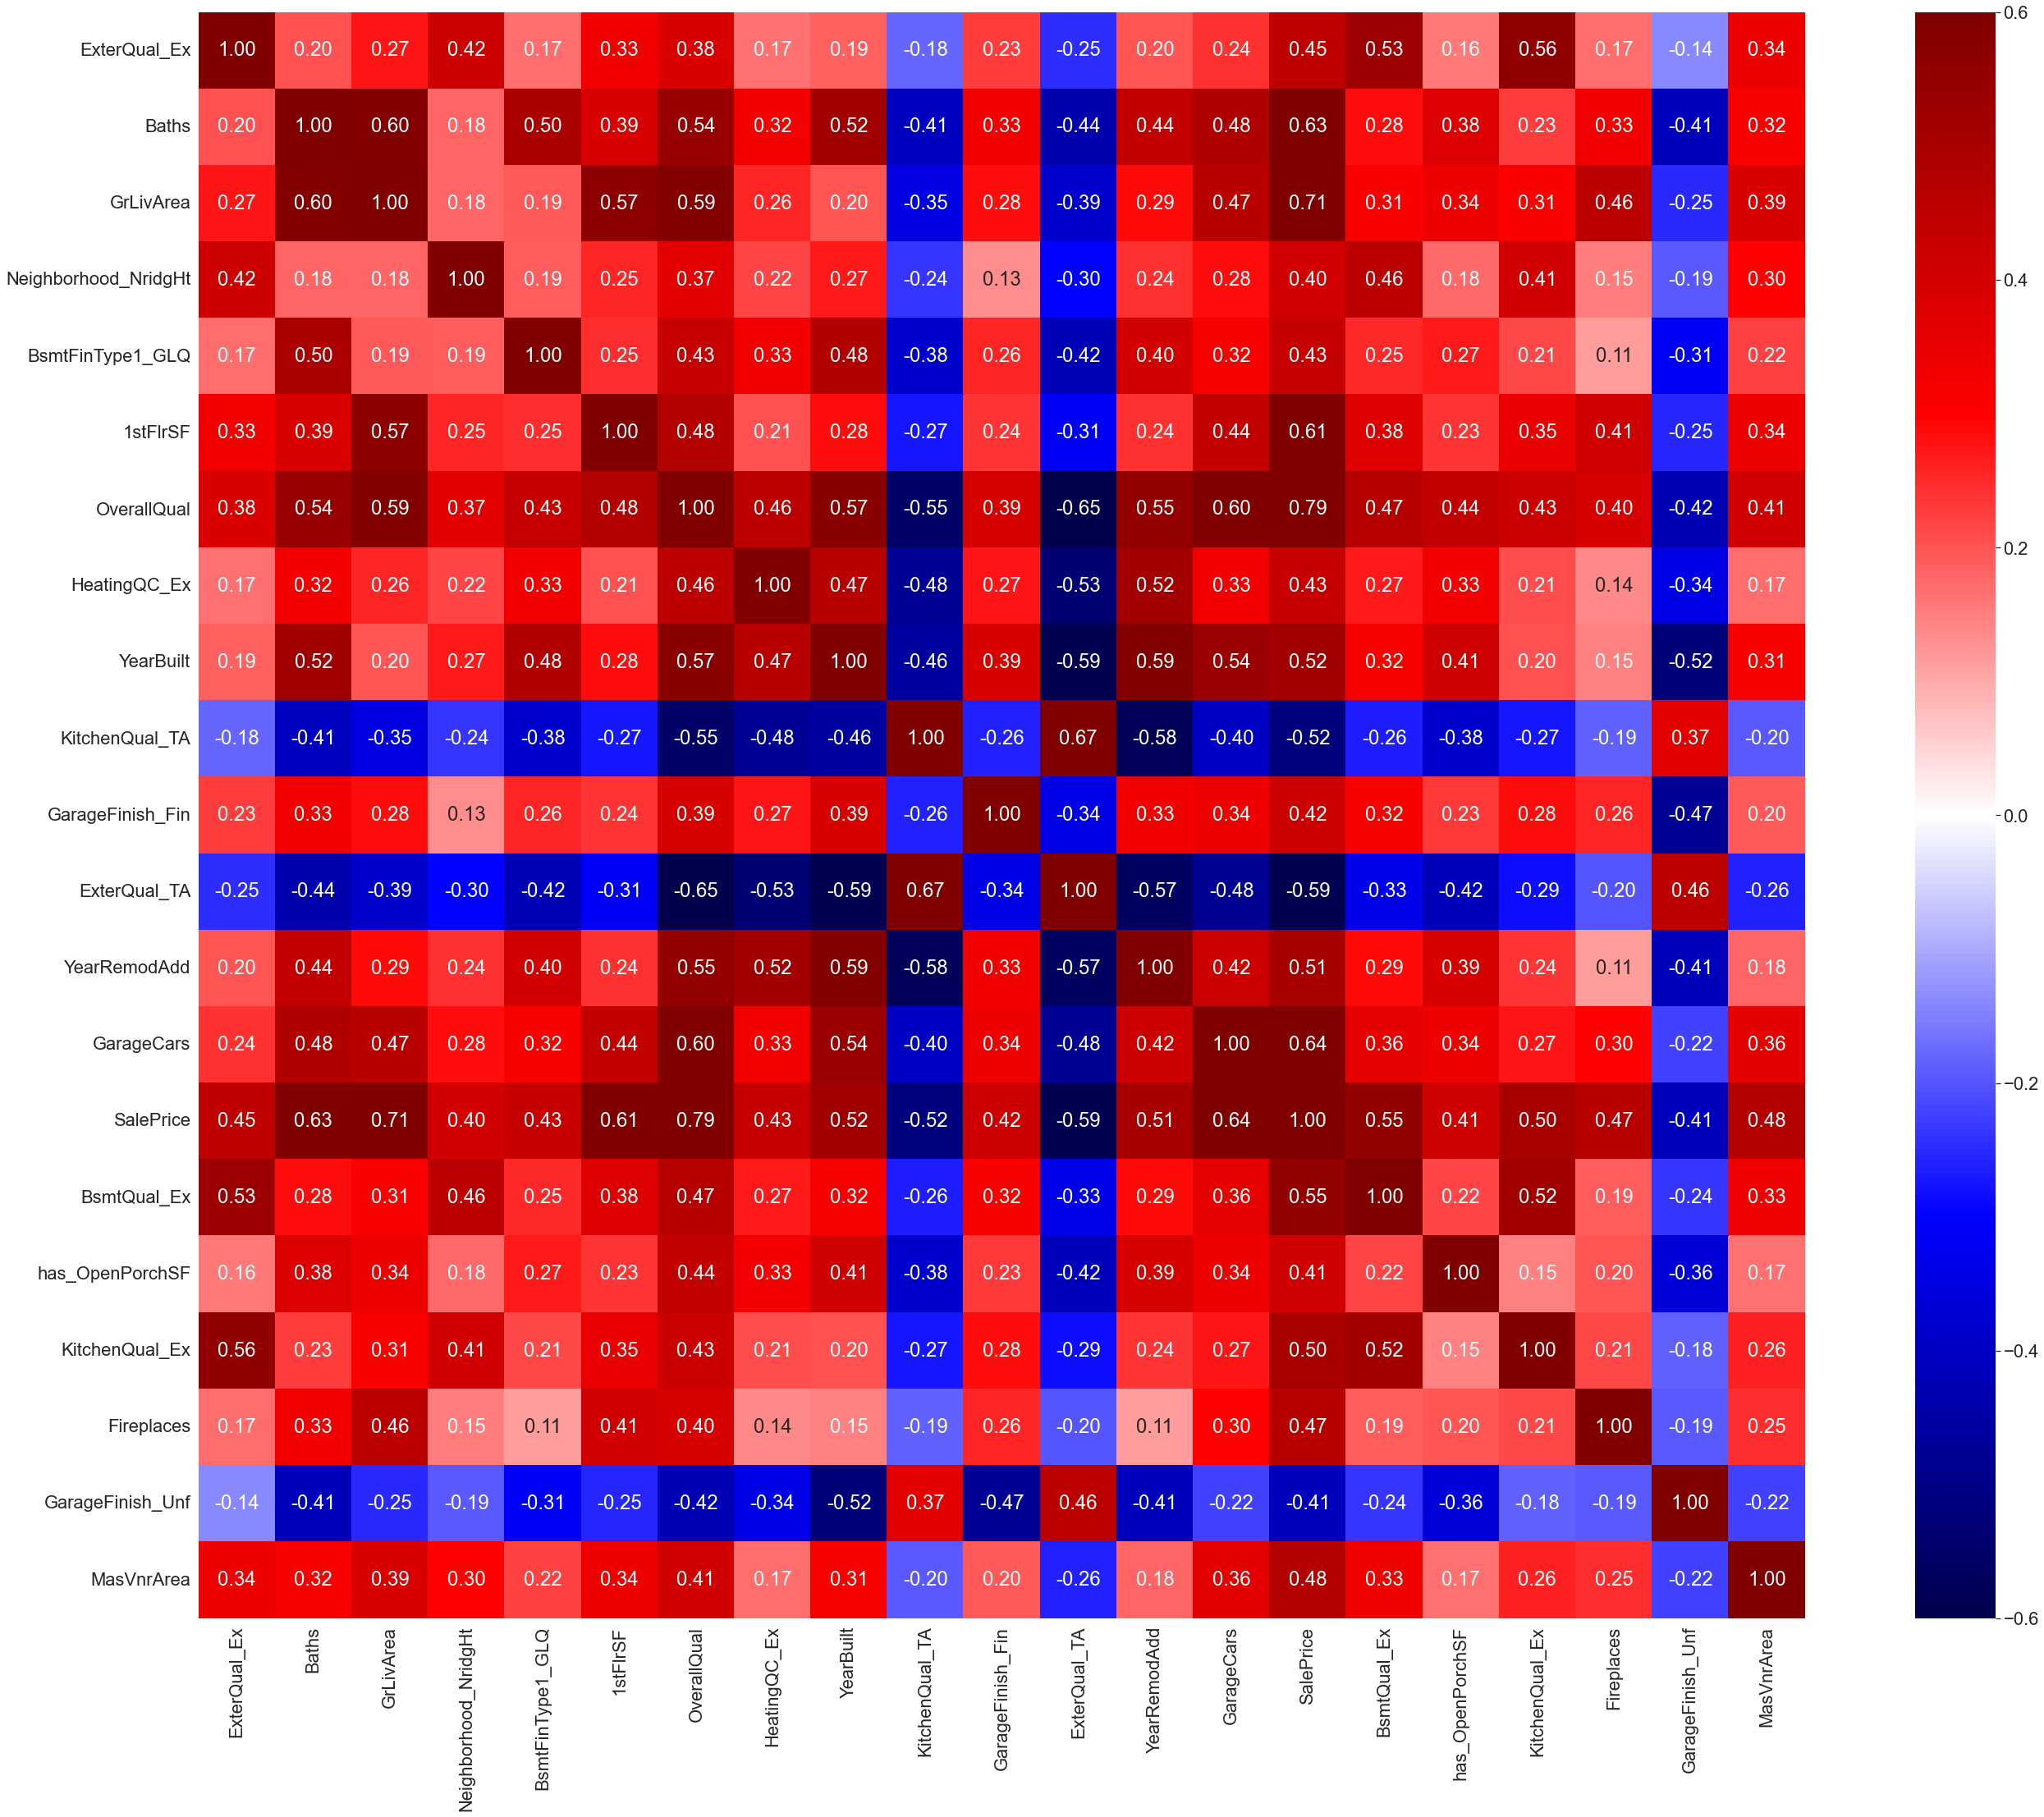

In [244]:
headers = list( set(corr_keep_headers) - set(to_drop) )
corr_dataset = pd.DataFrame()
corr_dataset[headers] = dataset[headers]

corr = corr_dataset.corr()

f, ax = plt.subplots(figsize=(48, 36))
sns.heatmap(corr, fmt='.2f', vmin=-0.6, vmax=0.6, square=True, annot=True, cmap="seismic")
sns.set(font_scale=2)
plt.show()

In [275]:
headers_train = sorted(headers)[:]
headers_test = headers_train[:]

train = corr_dataset.reindex(headers_test, axis = 1)

train.to_csv("train.csv", sep =",", index = False)

headers_test.remove("SalePrice")

In [276]:
data = pd.read_csv("raw_test.csv")

numeric_features = data.select_dtypes(include=[np.number])
numeric_features = numeric_features.drop(columns=["MSSubClass"])

roominess = data["GrLivArea"]/data["TotRmsAbvGrd"]
numeric_features["roominess"] = roominess

baths = data["FullBath"] + data["BsmtFullBath"] + 0.5*(data["HalfBath"] + data["BsmtHalfBath"])
numeric_features["Baths"] = baths

numeric_features = numeric_features.fillna(numeric_features.mean())

In [277]:
pseudo_binary_headers = ["MasVnrArea", "LowQualFinSF", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]
n_pseudo_binary = len(pseudo_binary_headers)
pseudo_binary_features = pd.DataFrame()
for i in range(n_pseudo_binary):
    header = pseudo_binary_headers[i]
    pseudo_binary_features["has_"+header] = (data[header] > 0).astype(int)

pseudo_binary_features["SalePrice"] = dataset["SalePrice"]

pseudo_binary_features["open_outside_areas"] = (data["WoodDeckSF"]+data["OpenPorchSF"] > 0).astype(int)
pseudo_binary_features["door_porch"] = (data["ScreenPorch"]+data["3SsnPorch"] > 0).astype(int)

pseudo_binary_features = pseudo_binary_features.fillna(0)

pseudo_binary_concat = pseudo_binary_features.drop(columns = "SalePrice")
numeric_features_2 = pd.concat([numeric_features, pseudo_binary_concat], axis = 1, join = "inner")

In [278]:
categoricals = data.select_dtypes(exclude=[np.number])
categoricals["MSSubClass"] = data["MSSubClass"]

categoricals = categoricals.fillna(0)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9848/1325050693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["MSSubClass"] = data["MSSubClass"]


In [279]:
to_encode = categoricals
encoded = pd.get_dummies(to_encode.astype(str))

In [280]:
categoricals_concat = encoded
encoded_data = pd.concat([numeric_features_2, categoricals_concat], axis = 1, join = "inner")

In [281]:
test = encoded_data[headers_test]

test.to_csv("test.csv", sep =",", index = False)

test

,1stFlrSF,Baths,BsmtFinType1_GLQ,BsmtQual_Ex,ExterQual_Ex,ExterQual_TA,Fireplaces,GarageCars,GarageFinish_Fin,GarageFinish_Unf,GrLivArea,HeatingQC_Ex,KitchenQual_Ex,KitchenQual_TA,MasVnrArea,Neighborhood_NridgHt,OverallQual,YearBuilt,YearRemodAdd,has_OpenPorchSF
0,896,1.0,0,0,0,1,0,1.0,0,1,896,0,0,1,0.0,0,5,1961,1961,0
1,1329,1.5,0,0,0,1,0,1.0,0,1,1329,0,0,0,108.0,0,6,1958,1958,1
2,928,2.5,1,0,0,1,1,2.0,1,0,1629,0,0,1,0.0,0,5,1997,1998,1
3,926,2.5,1,0,0,1,1,2.0,1,0,1604,1,0,0,20.0,0,6,1998,1998,1
4,1280,2.0,0,0,0,0,0,2.0,0,0,1280,1,0,0,0.0,0,8,1992,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,1.5,0,0,0,1,0,0.0,0,0,1092,0,0,1,0.0,0,4,1970,1970,0
1455,546,1.5,0,0,0,1,0,1.0,0,1,1092,0,0,1,0.0,0,4,1970,1970,1
1456,1224,2.0,0,0,0,1,1,2.0,0,1,1224,1,0,1,0.0,0,5,1960,1996,0
1457,970,1.5,1,0,0,1,0,0.0,0,0,970,0,0,1,0.0,0,5,1992,1992,1
